In [29]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/ML CaseStudy"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NBA_kaggle.csv


In [30]:
cd /content/drive/My Drive/ML CaseStudy

/content/drive/My Drive/ML CaseStudy


In [31]:
import pandas as pd
from pandas import DataFrame
import numpy as np

data = pd.read_csv("NBA_kaggle.csv")
copyD=data.copy()
copyD.fillna(copyD.median(),inplace=True)
copyD.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Text(0, 0.5, 'Frequency')

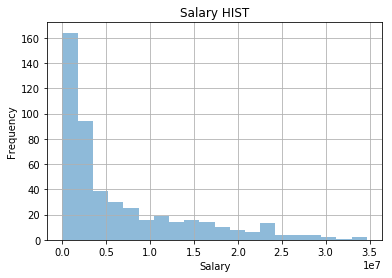

In [32]:
import matplotlib.pyplot as plt

copyD.Salary.hist(bins=20, alpha=0.5)
plt.title("Salary HIST")
plt.xlabel("Salary")
plt.ylabel("Frequency")

In [0]:
MPG=[]
for i in range(len(copyD)):
  G=(max(float(copyD['G'][i]),1.00))
  MP=float(copyD['MP'][i])
  MPG.append(MP/G)
  
copyD['MPG']=MPG

In [0]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
copyD['Tm']=le.fit_transform(copyD['Tm'])

In [0]:
from sklearn.model_selection import train_test_split

x = copyD[['MPG','USG%','PER','Age','TS%','Tm','NBA_DraftNumber','WS','TOV%','TRB%','AST%']]
y = copyD[['Salary']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [36]:
x_model.head()

,MPG,USG%,PER,Age,TS%,Tm,NBA_DraftNumber,WS,TOV%,TRB%,AST%
46,3.222222,18.5,9.5,20,0.337,29,28,0.0,0.0,21.6,5.0
139,15.733333,13.8,16.2,23,0.558,6,6,1.3,18.1,19.8,6.3
342,19.058824,22.5,13.1,23,0.479,25,34,0.6,12.7,7.5,22.8
93,13.275862,10.0,9.3,24,0.504,19,62,0.5,20.4,4.3,15.5
85,11.840580,15.5,11.1,23,0.526,12,18,1.1,10.3,10.4,6.0


In [37]:
from sklearn.linear_model import LinearRegression

lir= LinearRegression(normalize=True)

lir.fit(x_model,y_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
from sklearn.metrics import r2_score

y_pred=lir.predict(x_test)
r2_score(y_test,y_pred)

0.4407296223758669

In [39]:
import statistics

Class=[]
ch=[]

for i in range(len(copyD)):
  sal=float(copyD['Salary'][i]/1000000.0)
  per=abs(float(copyD['PER'][i]))
  
  ch.append(sal*per)
  val=(sal*per)
  if(val<=60):
    Class.append(0)
  else:
    Class.append(1)

print(statistics.median(ch))
print(str(Class[:10])+" "+ str(ch[:10]))
copyD['Class']=Class

42.594080000000005
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0] [0.48936899999999994, 58.42368, 212.9230716, 46.7523682, 25.069368, 15.0950265, 0.36337910000000007, 0.041472, 133.3870794, 29.576450000000005]


In [40]:
copyD.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MPG,Class
0,Zhou Qi,815615,China,43,22,10,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,5.437500,0
1,Zaza Pachulia,3477600,Georgia,42,33,9,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,14.196970,0
2,Zach Randolph,12307692,USA,19,36,25,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,25.559322,1
3,Zach LaVine,3202217,USA,13,22,3,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,27.333333,0
4,Zach Collins,3057240,USA,10,20,24,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,15.790323,0


In [0]:
from sklearn.model_selection import train_test_split

x = copyD.drop(columns=['Player','NBA_Country','Class'])
y = copyD[['Class']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression

lor= LogisticRegression()
lor.fit(x_model,y_model)
y_pred=lor.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("#################Logistic Regression##################")

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

#################Logistic Regression##################
0.6557377049180327
[[48 30]
 [12 32]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        78
           1       0.52      0.73      0.60        44

    accuracy                           0.66       122
   macro avg       0.66      0.67      0.65       122
weighted avg       0.70      0.66      0.66       122



In [44]:
from sklearn.svm import SVC

svc= SVC(kernel='linear')
svc.fit(x_model,y_model)

y_pred=svc.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("#################SVC##################")

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

#################SVC##################
0.9344262295081968
[[73  5]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        78
           1       0.89      0.93      0.91        44

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.94      0.93      0.93       122



In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(7)
knn.fit(x_model,y_model)

y_pred=knn.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("#################KNN##################")

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

#################KNN##################
0.9426229508196722
[[74  4]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        78
           1       0.91      0.93      0.92        44

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122



Diiferrest Features Selected:##############################################################################################

In [0]:
from sklearn.model_selection import train_test_split

x = copyD[['MPG','PER','WS','NBA_DraftNumber','Salary','Tm']]
y = copyD[['Class']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [49]:
from sklearn.linear_model import LogisticRegression

lor1= LogisticRegression()
lor1.fit(x_model,y_model)

y_pred=lor1.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("#################Logistic Regression##################")

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

#################Logistic Regression##################
0.36065573770491804
[[ 0 78]
 [ 0 44]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.36      1.00      0.53        44

    accuracy                           0.36       122
   macro avg       0.18      0.50      0.27       122
weighted avg       0.13      0.36      0.19       122



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
from sklearn.svm import SVC

svc1= SVC(kernel='linear')
svc1.fit(x_model,y_model)

y_pred=svc1.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("#################SVC##################")

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

#################SVC##################
0.9426229508196722
[[74  4]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        78
           1       0.91      0.93      0.92        44

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122



In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn1= KNeighborsClassifier(7)
knn1.fit(x_model,y_model)

y_pred=knn1.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("#################KNN##################")

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

#################KNN##################
0.9426229508196722
[[74  4]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        78
           1       0.91      0.93      0.92        44

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122



In [55]:
from sklearn.cluster import KMeans

X=copyD[['TS%','USG%']]

km= KMeans(n_clusters=3, random_state=1)
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

#################KMeans Plot##################


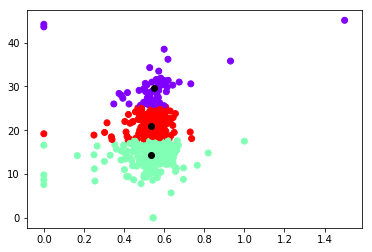

In [56]:
import matplotlib.pyplot as plt

print("#################KMeans Plot##################")

plt.scatter(X['TS%'], X['USG%'], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')